## Import required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
import seaborn as sns
from utils import Scatter_Violin_Plots, Performance_metrics, Hbar, Merge_Multiple_Files

## Import dataset

In [6]:
# Import the training dataset
train = pd.read_csv('./DataPreProcessing/df_Train.csv', converters={'site_no': str}, low_memory=False)

# Import the testing dataset
test = pd.read_csv('./DataPreProcessing/df_Test.csv', converters={'site_no': str}, low_memory=False)

# Import the NHDPlusV2.1 dataset
NHD = pd.read_csv('./DataPreProcessing/indep_var_reaches_CONUS.txt', converters={'site_no': str}, low_memory=False)

In [7]:
# Spliting the dependent (y) variable and independent (X) variables for training dataset
y_train= train[['mean_depth_va_ave']]
## Model 1
X_train_m1= train[['q_va_ave', 'TotDASqKM', 
                   'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                   'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde','D50_mm_', 'Mean_AI', 
                   'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                   'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]
## Model 2
X_train_m2= train[['QE_cms', 'TotDASqKM', 
                   'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                   'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde','D50_mm_', 'Mean_AI', 
                   'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                   'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

# Spliting the dependent (y) variable and independent (X) variables for testing dataset
y_test= test[['mean_depth_va_ave']]               
## Model 1
X_test_m1= test[['q_va_ave', 'TotDASqKM', 
                 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde','D50_mm_', 'Mean_AI', 
                 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                 'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]
## Model 2
X_test_m2= test[['QE_cms', 'TotDASqKM', 
                 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde','D50_mm_', 'Mean_AI', 
                 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                 'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]


# Excluding independent (X) variables for NHDPlusV2.1 dataset (Application)
df_COMID_NHD= NHD[['COMID', 'REACHCODE']] 
X_NHD= NHD[['QE_cms', 'TotDASqKM_y', 
            'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
            'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde_y','D50_mm_', 'Mean_AI', 
            'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
            'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

## Create models

### a) Make prediction on testing dataset using final MLR mode

In [8]:
# Model 1
m1_Intercept = 0.7388977
m1_q_va_ave = 0.282824
m1_CAT_POPDENS10 = -0.023036
m1_MINELEVSMO = -0.105813
m1_SLOPE = -0.019925
m1_NLCD_Forest_ = -0.027351
m1_CAT_SILTAVE = -0.214507
m1_CAT_SANDAVE = -0.150012
mlr_pred_m1 =   (10**m1_Intercept) * (X_test_m1['q_va_ave']**m1_q_va_ave) * (X_test_m1['CAT_POPDENS10']**m1_CAT_POPDENS10) * (X_test_m1['MINELEVSMO']**m1_MINELEVSMO) * (X_test_m1['SLOPE']**m1_SLOPE) * (X_test_m1['NLCD_Forest_%']**m1_NLCD_Forest_) * (X_test_m1['CAT_SILTAVE']**m1_CAT_SILTAVE) * (X_test_m1['CAT_SANDAVE']**m1_CAT_SANDAVE)        

# Model 2
m2_Intercept = 0.8695315
m2_ACC_NDAMS2010 = 0.0418882
m2_CAT_POPDENS10 = -0.021985
m2_StreamOrde = -0.277112
m2_MINELEVSMO = -0.099267
m2_SLOPE = -0.017987
m2_NLCD_Forest_ = -0.038262
m2_QE_cms = 0.237752
m2_CAT_SILTAVE = -0.189899
m2_CAT_SANDAVE = -0.138954
mlr_pred_m2 = (10**m2_Intercept) * (X_test_m2['ACC_NDAMS2010']**m2_ACC_NDAMS2010) * (X_test_m2['CAT_POPDENS10']**m2_CAT_POPDENS10) * (X_test_m2['StreamOrde']**m2_StreamOrde) * (X_test_m2['MINELEVSMO']**m2_MINELEVSMO) * (X_test_m2['SLOPE']**m2_SLOPE) * (X_test_m2['NLCD_Forest_%']**m2_NLCD_Forest_) * (X_test_m2['QE_cms']**m2_QE_cms) * (X_test_m2['CAT_SILTAVE']**m2_CAT_SILTAVE) * (X_test_m2['CAT_SANDAVE']**m2_CAT_SANDAVE)

### b) Make prediction on testing dataset using final RFR mode

In [9]:
# Model 1
with open('./RFR/Best_Param/meanflow_depth_m1_rfr', "rb") as fp:
    RFR_m1 = pickle.load(fp)
rfr_pred_m1 = RFR_m1.predict(X_test_m1.values)

# Model 2
with open('./RFR/Best_Param/meanflow_depth_m2_rfr', "rb") as fp:
    RFR_m2 = pickle.load(fp)
rfr_pred_m2 = RFR_m2.predict(X_test_m2.values)

### c) Make prediction on testing dataset using final XGBR model

In [10]:
# Model 1
with open('./XGBR/Best_Param/meanflow_depth_m1_xgbr', "rb") as fp:
    XGBR_m1 = pickle.load(fp)
xgb_pred_m1 = XGBR_m1.predict(X_test_m1.values)

# Model 2
with open('./XGBR/Best_Param/meanflow_depth_m2_xgbr', "rb") as fp:
    XGBR_m2 = pickle.load(fp)
xgb_pred_m2 = XGBR_m2.predict(X_test_m2.values)

## Performance Metrics

In [11]:
Model_names = ['XGBR', 'RFR', 'MLR']
pred_list= [[xgb_pred_m1, rfr_pred_m1, mlr_pred_m1], [xgb_pred_m2, rfr_pred_m2, mlr_pred_m2]]
Metrics = pd.DataFrame()
for i in range (0,2):
    for j in range(0,3):
        X = y_test
        Y = pred_list[i][j]
        df = pd.DataFrame({f'{Model_names[j]}': [ Performance_metrics(X, Y, "Yes")[0], Performance_metrics(X, Y, "Yes")[1], Performance_metrics(X, Y, "Yes")[2], Performance_metrics(X, Y, "Yes")[3], Performance_metrics(X, Y, "Yes")[4]]})
        Metrics= pd.concat([df, Metrics], axis=1)
    Metrics = Metrics.rename( index={  0:'R\N{SUPERSCRIPT TWO}', 1:'NSE', 2:'KGE', 3:'APB (%)',  4:'RMSE (cms)'})

# Export performance metrics for future
Metrics.to_csv('./ModelApplication/Output/D_mf_performance_metrics.csv')

In [12]:
print('Perfomance Metrics Results for Model 1:')
Metrics.iloc[5:10,3:6].style

Perfomance Metrics Results for Model 1:


,MLR,RFR,XGBR
R²,0.72,0.72,0.73
NSE,0.70,0.71,0.72
KGE,0.67,0.82,0.84
APB (%),30.36,31.94,31.50
RMSE (cms),0.71,0.69,0.68


In [13]:
print('Perfomance Metrics Results for Model 2:')
Metrics.iloc[0:5,0:3].style

Perfomance Metrics Results for Model 2:


,MLR,RFR,XGBR
R²,0.61,0.65,0.68
NSE,0.57,0.65,0.67
KGE,0.52,0.77,0.79
APB (%),34.11,34.76,33.89
RMSE (cms),0.85,0.76,0.73


## Scatter and Violin plots of all models

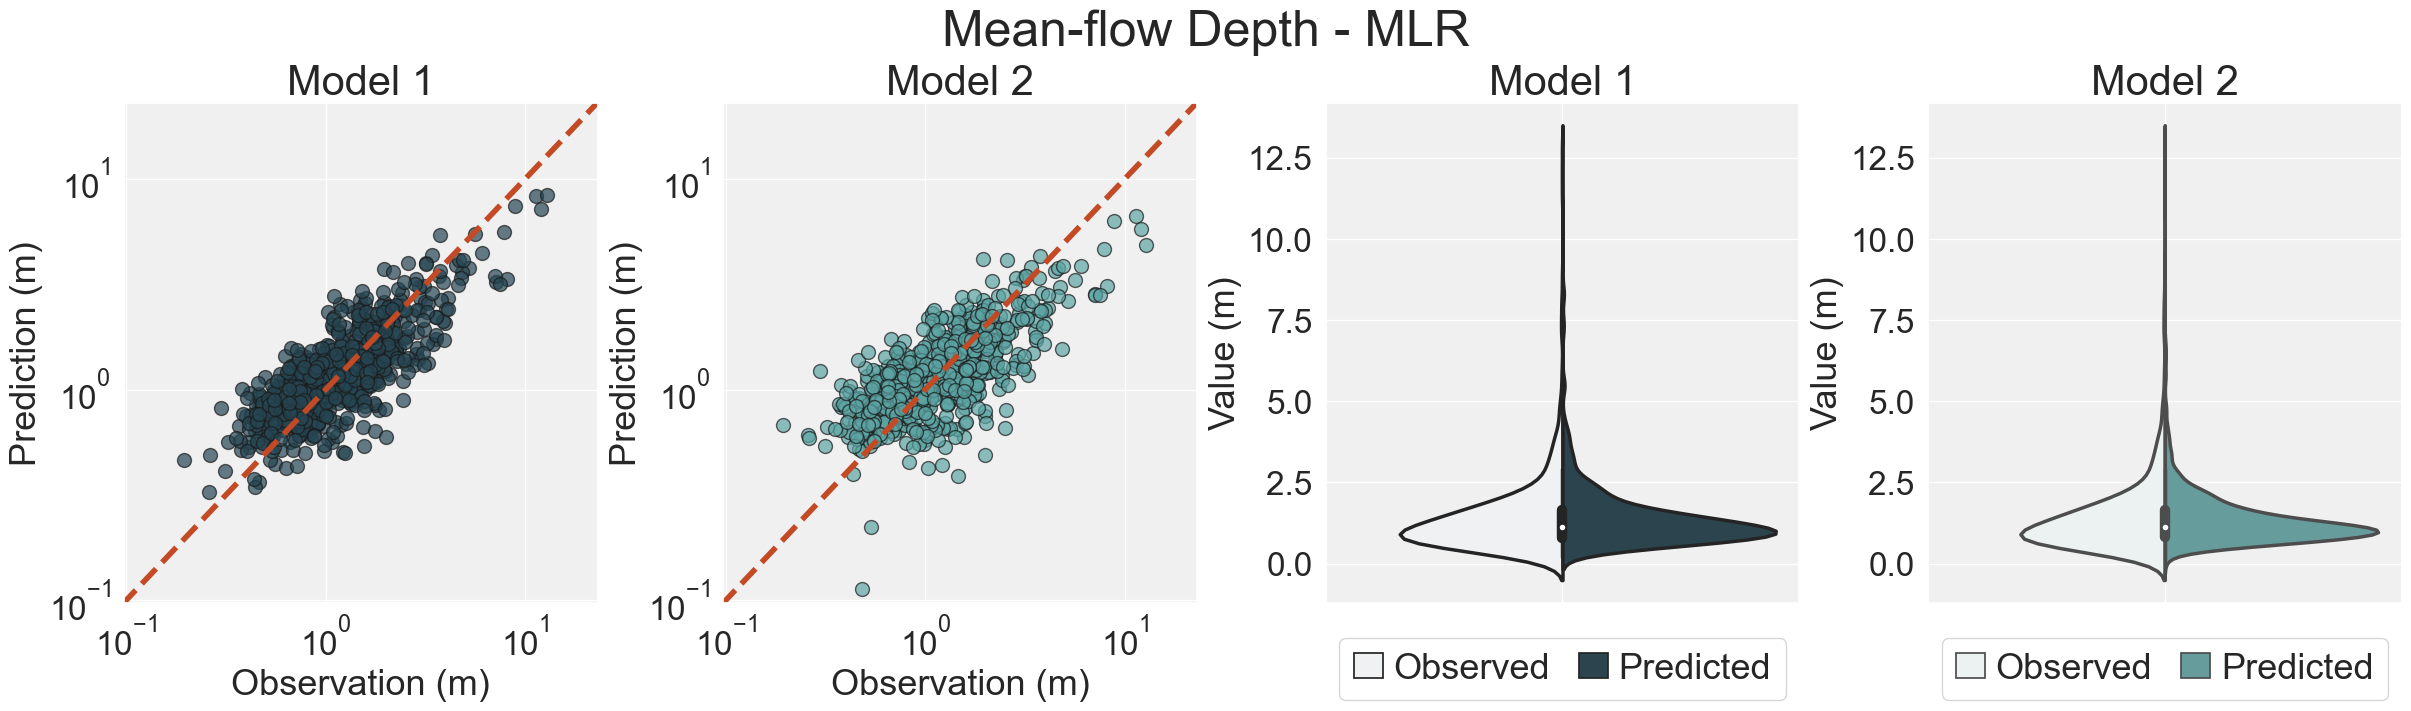

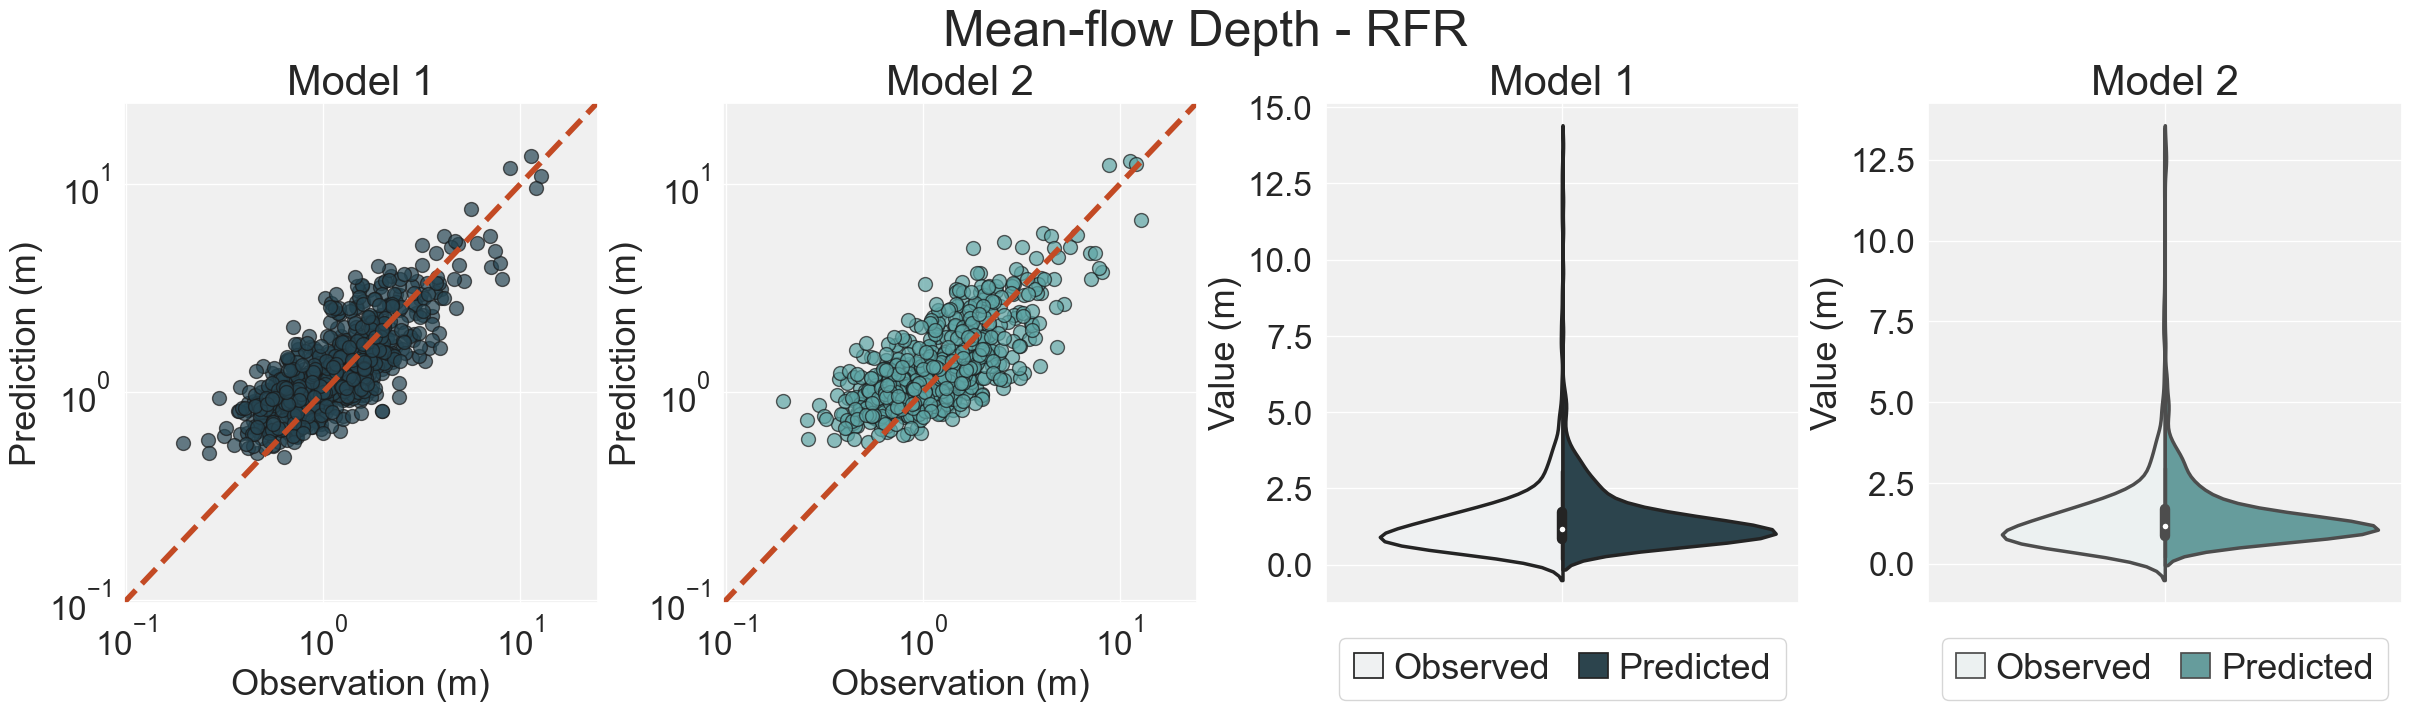

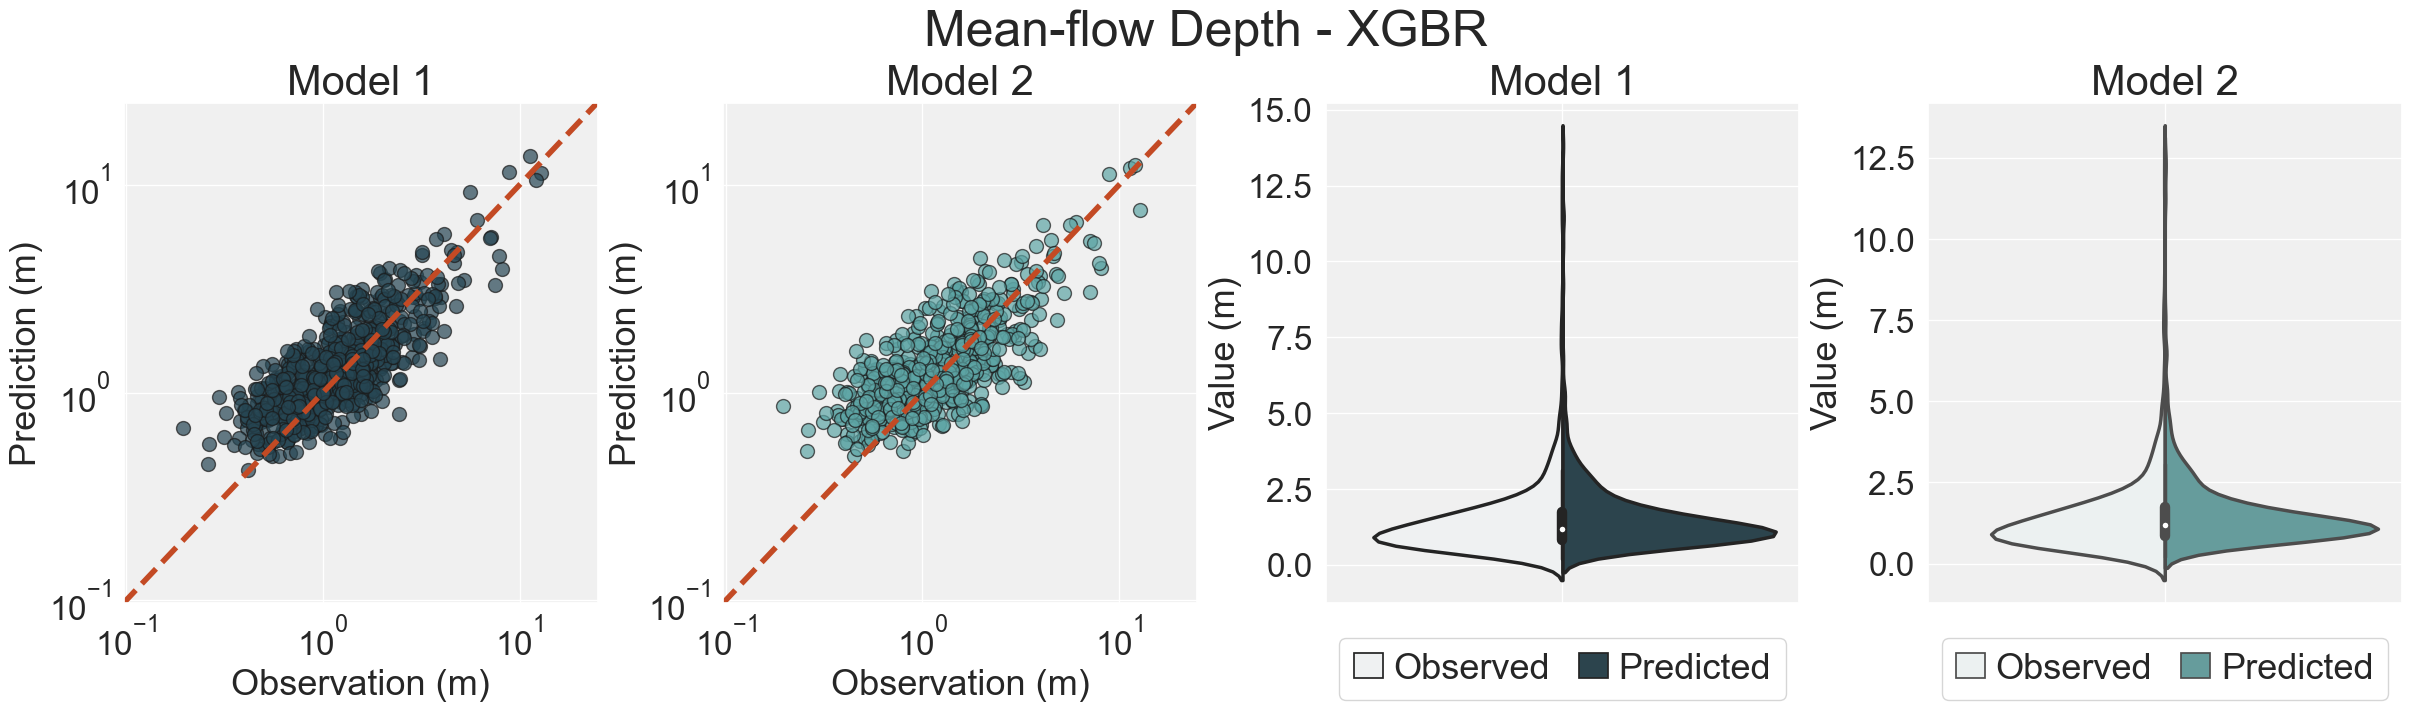

In [14]:
Y = [mlr_pred_m1, rfr_pred_m1, xgb_pred_m1]
y = [mlr_pred_m2, rfr_pred_m2, xgb_pred_m2]
models = ['Mean-flow Depth - MLR', 'Mean-flow Depth - RFR', 'Mean-flow Depth - XGBR']
for i in range (0,3):
    Scatter_Violin_Plots(y_test, Y[i], y[i], "Observation (m)", "Prediction (m)",  "Value (m)", "Model 1", "Model 2", models[i])

## Apply hybrid approcah coupling MLR and XGBR to NHDPlus dataset

In [15]:
# Make prediction on NHDPlusV2.1 dataset using final XGBR model
xgb_pred_NHD0 = pd.DataFrame(XGBR_m2.predict(X_NHD))
xgb_pred_NHD0.columns = ['D_mf_PRE_NHD_xgb']
D_mf = Merge_Multiple_Files([df_COMID_NHD, X_NHD, xgb_pred_NHD0], None)

# If predicted value is negative, apply MLR for prediction
D_mf.loc[D_mf['D_mf_PRE_NHD_xgb'] < 0, 'D_mf_PRE_NHD_final'] = (10**m2_Intercept) * (D_mf['ACC_NDAMS2010']**m2_ACC_NDAMS2010) * (D_mf['CAT_POPDENS10']**m2_CAT_POPDENS10) * (D_mf['StreamOrde_y']**m2_StreamOrde) * (D_mf['MINELEVSMO']**m2_MINELEVSMO) * (D_mf['SLOPE']**m2_SLOPE) * (D_mf['NLCD_Forest_%']**m2_NLCD_Forest_) * (D_mf['QE_cms']**m2_QE_cms) * (D_mf['CAT_SILTAVE']**m2_CAT_SILTAVE) * (D_mf['CAT_SANDAVE']**m2_CAT_SANDAVE)
D_mf.loc[D_mf['D_mf_PRE_NHD_xgb'] < 0, 'xgb_or_mlr'] = 'mlr'

# If predicted value is equal or greater than zero, keep the predicted value through XGBR
D_mf.loc[D_mf['D_mf_PRE_NHD_xgb'] >= 0, 'D_mf_PRE_NHD_final'] = D_mf['D_mf_PRE_NHD_xgb']
D_mf.loc[D_mf['D_mf_PRE_NHD_xgb'] >= 0, 'xgb_or_mlr'] = 'xgb'

# Export the predicted values
D_mf = D_mf[['COMID','REACHCODE', 'TotDASqKM_y', 'StreamOrde_y', 'D_mf_PRE_NHD_final', 'xgb_or_mlr']]
D_mf.to_csv('./ModelApplication/Output/D_mf_NHD_reaches.txt')